In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

ModuleNotFoundError: No module named 'matplotlib'

Load `agriculture_dataset.csv` as `df`.

In [ ]:
df = pd.read_csv("./data/agriculture_dataset.csv")
df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


# Exploratory Data Analysis

Create a copy of the dataset to use for cleaning.

Drop the `Season` column.

Check for duplicates and missing values.

In [ ]:
clean_df = df.copy()
clean_df = clean_df.drop(columns=['Season'])
print(f"Duplicate values: {clean_df.duplicated().sum()}")
print(f"Missing values: {clean_df.duplicated().sum()}")

Duplicate values: 0
Missing values: 0


In [ ]:
clean_df.head(10)

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,93718.69
5,F006,Sugarcane,12.50,Sprinkler,6.42,2.25,38.18,Loamy,46487.98
6,F007,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,40583.57
7,F008,Rice,464.60,Drip,5.18,0.91,4.23,Silty,9392.38
8,F009,Maize,389.37,Drip,0.57,4.93,3.86,Peaty,60202.14
9,F010,Soybean,184.37,Drip,2.18,2.67,17.25,Sandy,90922.15


Visualize Crop Yield values to identify outliers.

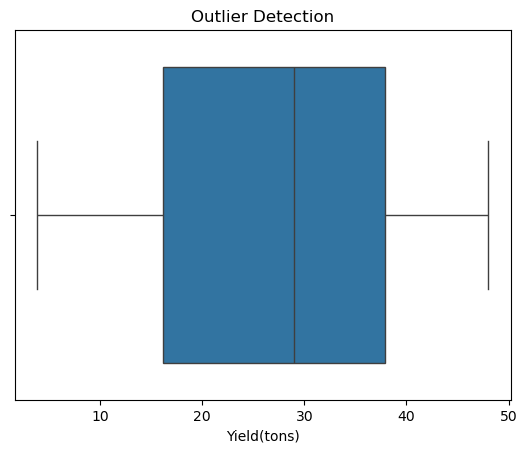

In [ ]:
sns.boxplot(x=clean_df['Yield(tons)'])
plt.title('Outlier Detection')
plt.show()

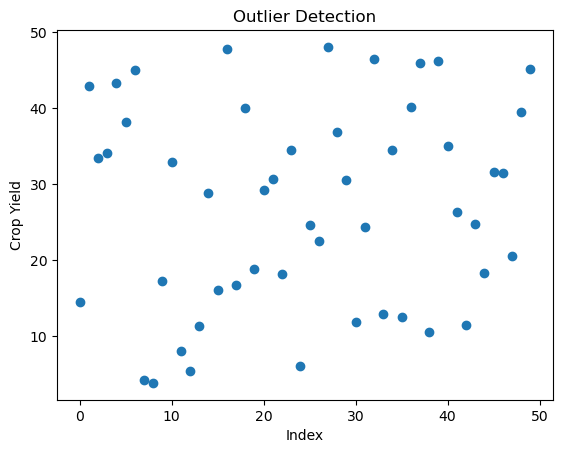

In [ ]:
plt.scatter(range(len(clean_df['Yield(tons)'])), clean_df['Yield(tons)'])
plt.xlabel('Index')
plt.ylabel('Crop Yield')
plt.title('Outlier Detection')
plt.show()

In [ ]:
clean_df['z_score'] = np.abs(stats.zscore(clean_df['Yield(tons)']))
outliers = clean_df[clean_df['z_score'] > 3]
outliers

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Water_Usage(cubic meters),z_score


In [ ]:
outliers.shape[0]

0

Based on a z-score of 3 there does not seem to be any significant outlier values for crop yield that should be removed.

## Categorically Encode Irrigation Type and Soil Type

In [ ]:
encoded_df = pd.get_dummies(clean_df, columns=['Irrigation_Type', 'Soil_Type'])
encoded_df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),z_score,Irrigation_Type_Drip,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Clay,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty
0,F001,Cotton,329.40,8.14,2.21,14.44,76648.20,0.955156,False,False,False,False,True,False,True,False,False,False
1,F002,Carrot,18.67,4.77,4.36,42.91,68725.54,1.199759,False,False,True,False,False,False,False,True,False,False
2,F003,Sugarcane,306.03,2.91,0.56,33.44,75538.56,0.482967,False,True,False,False,False,False,False,False,False,True
3,F004,Tomato,380.21,3.32,4.35,34.08,45401.23,0.531409,False,False,False,True,False,False,False,False,False,True
4,F005,Tomato,135.56,8.33,4.48,43.28,93718.69,1.227764,False,False,False,False,True,True,False,False,False,False


## Top 3 Crops

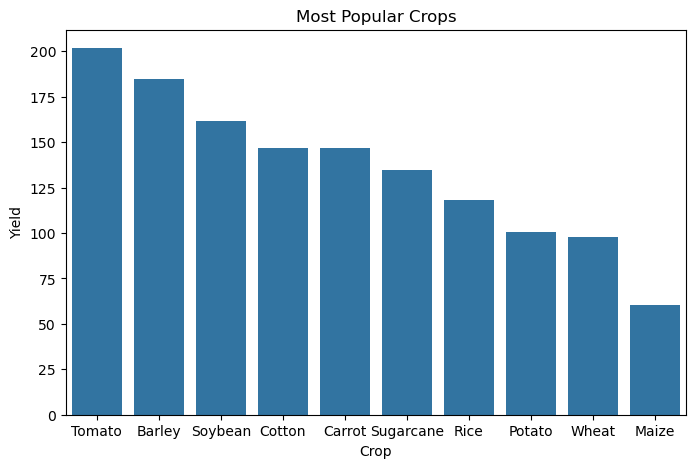

In [ ]:
popular_by_yield = encoded_df.groupby('Crop_Type')['Yield(tons)'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=popular_by_yield.index, y=popular_by_yield.values)
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.title("Most Popular Crops")
plt.show()

In [ ]:
top_3_crops = popular_by_yield.head(3).index.tolist()
print(f"Top 3 crops by yield: {top_3_crops}")

Top 3 crops by yield: ['Tomato', 'Barley', 'Soybean']


The 3 crops with the highest yield are **Tomatoes**, **Barley**, and **Soybeans**. We will use these three crops to analyze the relationship between crop yield and input factors.

In [ ]:
df_tomatoes = encoded_df[encoded_df['Crop_Type'] == 'Tomato']
df_barley = encoded_df[encoded_df['Crop_Type'] == 'Barley']
df_soybeans = encoded_df[encoded_df['Crop_Type'] == 'Soybean']

## Fertilizer Usage

Create a new column to calculate the Fertilizer Usage to Crop Yield ratio.

In [ ]:
encoded_df['fertilizer_to_yield_ratio'] = encoded_df['Fertilizer_Used(tons)'] / encoded_df['Yield(tons)']
encoded_df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),z_score,Irrigation_Type_Drip,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Clay,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,fertilizer_to_yield_ratio
0,F001,Cotton,329.40,8.14,2.21,14.44,76648.20,0.955156,False,False,False,False,True,False,True,False,False,False,0.563712
1,F002,Carrot,18.67,4.77,4.36,42.91,68725.54,1.199759,False,False,True,False,False,False,False,True,False,False,0.111163
2,F003,Sugarcane,306.03,2.91,0.56,33.44,75538.56,0.482967,False,True,False,False,False,False,False,False,False,True,0.087022
3,F004,Tomato,380.21,3.32,4.35,34.08,45401.23,0.531409,False,False,False,True,False,False,False,False,False,True,0.097418
4,F005,Tomato,135.56,8.33,4.48,43.28,93718.69,1.227764,False,False,False,False,True,True,False,False,False,False,0.192468


In [ ]:
tomato_corr, tomato_pval = pearsonr(df_tomatoes['Fertilizer_Used(tons)'], df_tomatoes['Yield(tons)'])
barley_corr, barley_pval = pearsonr(df_barley['Fertilizer_Used(tons)'], df_barley['Yield(tons)'])
soybean_corr, soybean_pval = pearsonr(df_soybeans['Fertilizer_Used(tons)'], df_soybeans['Yield(tons)'])

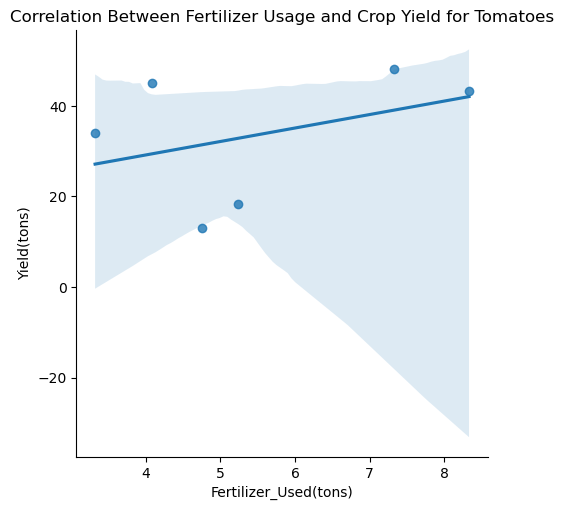

Correlation between Fertilizer Usage and Tomato Yield: 0.39, p-value: 0.45


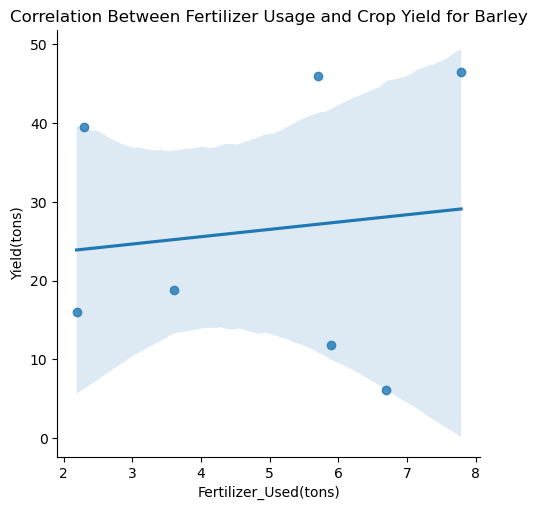

Correlation between Fertilizer Usage and Barley Yield: 0.12, p-value: 0.80


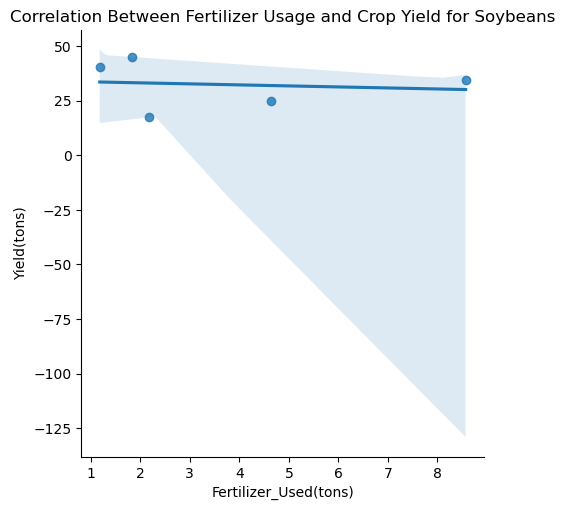

Correlation between Fertilizer Usage and Soybean Yield: -0.13, p-value: 0.80


In [ ]:
# Plot for Tomatoes
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_tomatoes)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Tomatoes")
plt.show()
print(f"Correlation between Fertilizer Usage and Tomato Yield: {tomato_corr:.2f}, p-value: {tomato_pval:.2f}")

# Plot for Barley
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_barley)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Barley")
plt.show()
print(f"Correlation between Fertilizer Usage and Barley Yield: {barley_corr:.2f}, p-value: {barley_pval:.2f}")

# Plot for Soybean
sns.lmplot(x='Fertilizer_Used(tons)', y='Yield(tons)', data=df_soybeans)
plt.title("Correlation Between Fertilizer Usage and Crop Yield for Soybeans")
plt.show()
print(f"Correlation between Fertilizer Usage and Soybean Yield: {soybean_corr:.2f}, p-value: {barley_pval:.2f}")

### Fertilizer Correlation Findings
The correlation between Fertilizer Usage and Tomato Yield seems to be statistically significant, as it has a P-value of 0.45. The fertilizer usage does not show a significant correlation for Barley and Soybean yield.

## Pesticide Usage

Create a new column to calculate the Pesticide Usage to Crop Yield ratio.

In [ ]:
encoded_df['pesticide_to_yield_ratio'] = encoded_df['Pesticide_Used(kg)'] / encoded_df['Yield(tons)']
encoded_df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),z_score,Irrigation_Type_Drip,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Clay,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,fertilizer_to_yield_ratio,pesticide_to_yield_ratio
0,F001,Cotton,329.40,8.14,2.21,14.44,76648.20,0.955156,False,False,False,False,True,False,True,False,False,False,0.563712,0.153047
1,F002,Carrot,18.67,4.77,4.36,42.91,68725.54,1.199759,False,False,True,False,False,False,False,True,False,False,0.111163,0.101608
2,F003,Sugarcane,306.03,2.91,0.56,33.44,75538.56,0.482967,False,True,False,False,False,False,False,False,False,True,0.087022,0.016746
3,F004,Tomato,380.21,3.32,4.35,34.08,45401.23,0.531409,False,False,False,True,False,False,False,False,False,True,0.097418,0.127641
4,F005,Tomato,135.56,8.33,4.48,43.28,93718.69,1.227764,False,False,False,False,True,True,False,False,False,False,0.192468,0.103512


In [ ]:
tomato_corr, tomato_pval = pearsonr(df_tomatoes['Pesticide_Used(kg)'], df_tomatoes['Yield(tons)'])
barley_corr, barley_pval = pearsonr(df_barley['Pesticide_Used(kg)'], df_barley['Yield(tons)'])
soybean_corr, soybean_pval = pearsonr(df_soybeans['Pesticide_Used(kg)'], df_soybeans['Yield(tons)'])

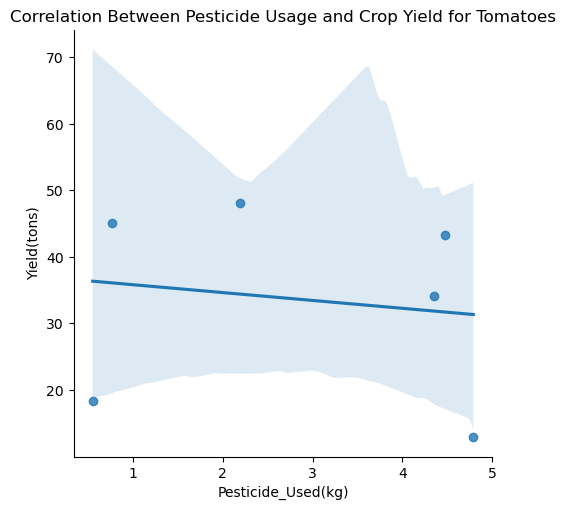

Correlation between Pesticide Usage and Tomato Yield: -0.15, p-value: 0.77


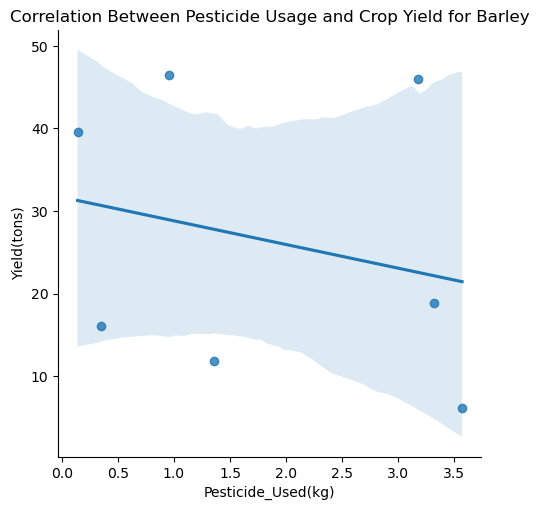

Correlation between Pesticide Usage and Barley Yield: -0.25, p-value: 0.59


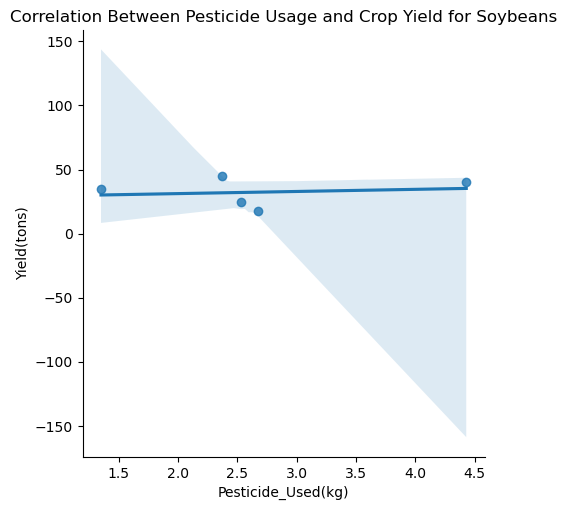

Correlation between Pesticide Usage and Soybean Yield: 0.16, p-value: 0.59


In [ ]:
# Plot for Tomatoes
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_tomatoes)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Tomatoes")
plt.show()
print(f"Correlation between Pesticide Usage and Tomato Yield: {tomato_corr:.2f}, p-value: {tomato_pval:.2f}")

# Plot for Barley
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_barley)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Barley")
plt.show()
print(f"Correlation between Pesticide Usage and Barley Yield: {barley_corr:.2f}, p-value: {barley_pval:.2f}")

# Plot for Soybean
sns.lmplot(x='Pesticide_Used(kg)', y='Yield(tons)', data=df_soybeans)
plt.title("Correlation Between Pesticide Usage and Crop Yield for Soybeans")
plt.show()
print(f"Correlation between Pesticide Usage and Soybean Yield: {soybean_corr:.2f}, p-value: {barley_pval:.2f}")

### Pesticide Correlation Findings

The correlation and P-value found for Tomatoes, Barley, and Soybeans suggest that there is no significant correlation between pesticide usage and crop yield.